<a href="https://colab.research.google.com/github/Camouflage10/CNN/blob/experiment/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def CNN_model(inputShape=input_shape):
  model=Sequential()
  #input
  model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=inputShape))
  #hidden layer
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(.5))
  #output
  model.add(Dense(num_classes, activation="softmax"))
  #compile model
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [4]:
model=CNN_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
batch_size = 128
epochs = 10

hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 47s 110ms/step - loss: 0.3751 - accuracy: 0.8857 - val_loss: 0.0891 - val_accuracy: 0.9765
Epoch 2/10
422/422 [==============================] - 54s 127ms/step - loss: 0.1159 - accuracy: 0.9647 - val_loss: 0.0575 - val_accuracy: 0.9850
Epoch 3/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0872 - accuracy: 0.9733 - val_loss: 0.0492 - val_accuracy: 0.9880
Epoch 4/10
422/422 [==============================] - 43s 101ms/step - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0413 - val_accuracy: 0.9897
Epoch 5/10
422/422 [==============================] - 43s 103ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 6/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0558 - accuracy: 0.9820 - val_loss: 0.0365 - val_accuracy: 0.9913
Epoch 7/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0355 - val_ac

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
with open('metrics.txt', 'w') as outfile:
  outfile.write("Test loss: " + str(round(score[0],5)))
  outfile.write("\nTest accuracy: " + str(round(score[1],5))+"\n")

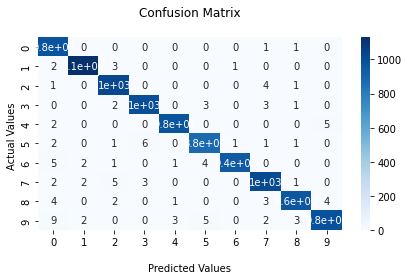

In [9]:
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
fig1 = plt.gcf()
fig1.savefig('cm.png', dpi=100)

plt.show()